OBJECTIVES:
- Read .dat file
- Plot Stress x Strain
- Be able to make a linear numerical extrapolation with the data
- Based on that, extract the Young Modulus

# NODE DATA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## First, define path to data
Stress_Strain_node = '/content/drive/MyDrive/Projetos_pessoais/Tese_Polimi/Stress_Strain_node.dat' #In this case, I'm usign a file from my Drive, but you may also use this by specifying any directory from your PC
Header_rows_node = 0 ## If Abaqus .dat file -> 0

In [ ]:
## Reading file
data_node = pd.read_csv(Stress_Strain_node,sep='\s+',header=Header_rows_node)
data_node = pd.DataFrame(data_node)
print(data_node) #Check if data was read correctly

           X  Stress_Strain
0   0.000000       0.000000
1   0.000001       0.000095
2   0.000003       0.000190
3   0.000005       0.000333
4   0.000008       0.000546
5   0.000012       0.000867
6   0.000019       0.001348
7   0.000029       0.002069
8   0.000044       0.003151
9   0.000066       0.004774
10  0.000100       0.007209
11  0.000151       0.010861
12  0.000227       0.016339
13  0.000341       0.024557
14  0.000512       0.036883
15  0.000769       0.055372
16  0.001154       0.083105
17  0.001731       0.124705
18  0.002598       0.187105
19  0.003897       0.280704
20  0.005847       0.421104
21  0.008770       0.631704
22  0.013156       0.947603
23  0.013190       0.950000


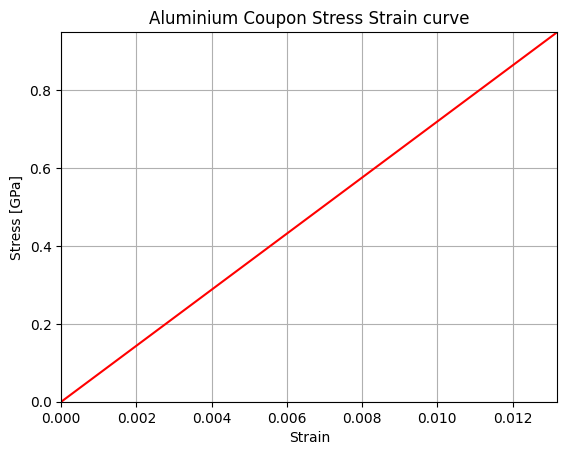

In [ ]:
## Ploting results
Strain_node = data_node['X']
Stress_node = data_node['Stress_Strain']
plt.plot(Strain_node, Stress_node,'r')
plt.xlim([data_node['X'].min(), data_node['X'].max()])
plt.ylim([data_node['Stress_Strain'].min(), data_node['Stress_Strain'].max()])
plt.grid()
plt.title("Aluminium Coupon Stress Strain curve")
plt.xlabel("Strain")
plt.ylabel("Stress [GPa]")
plt.show()

In [ ]:
## Now, let's try to extract the Young Modulus by interpolating the data into a linear function
linear_node = data_node.interpolate(method='linear')
rows_node = len(linear_node)
E_node = linear_node.iloc[rows_node-2,1]/linear_node.iloc[rows_node-2,0]
print('Young Modulus (Node) =', E_node, 'GPa')

Young Modulus (Node) = 72.0265576187834 GPa


# ELEMENT DATA

In [ ]:
## First, define path to data
Stress_Strain_element = '/content/drive/MyDrive/Projetos_pessoais/Tese_Polimi/Stress_Strain_element.dat'
Header_rows_element = 0 ## If Abaqus .dat file -> 0

## Reading file
data_element = pd.read_csv(Stress_Strain_element,sep='\s+',header=Header_rows_element)
data_element = pd.DataFrame(data_element)
print(data_element) #Check if data was read correctly

           X  Stress_Strain
0   0.000000       0.000000
1   0.000001       0.000095
2   0.000003       0.000190
3   0.000005       0.000332
4   0.000008       0.000546
5   0.000012       0.000867
6   0.000019       0.001348
7   0.000029       0.002069
8   0.000044       0.003151
9   0.000067       0.004774
10  0.000101       0.007209
11  0.000151       0.010861
12  0.000228       0.016339
13  0.000342       0.024556
14  0.000514       0.036882
15  0.000772       0.055371
16  0.001159       0.083104
17  0.001739       0.124703
18  0.002610       0.187103
19  0.003915       0.280702
20  0.005873       0.421100
21  0.008810       0.631697
22  0.013216       0.947593
23  0.013250       0.949990


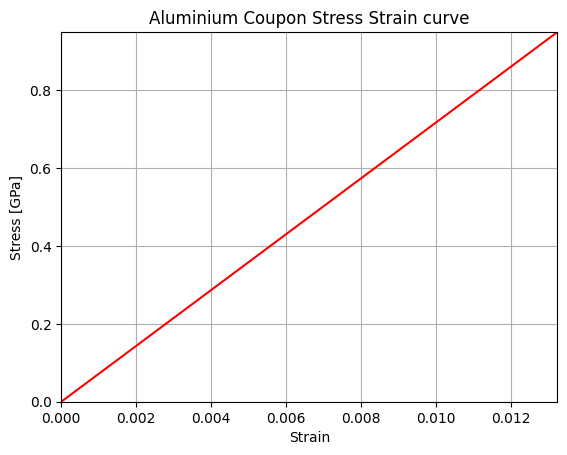

In [ ]:
## Ploting results
Strain_element = data_element['X']
Stress_element = data_element['Stress_Strain']
plt.plot(Strain_element, Stress_element,'r')
plt.xlim([data_element['X'].min(), data_element['X'].max()])
plt.ylim([data_element['Stress_Strain'].min(), data_element['Stress_Strain'].max()])
plt.grid()
plt.title("Aluminium Coupon Stress Strain curve")
plt.xlabel("Strain")
plt.ylabel("Stress [GPa]")
plt.show()

In [ ]:
## Now, let's try to extract the Young Modulus by interpolating the data into a linear function
linear_element = data_element.interpolate(method='linear')
rows_element = len(linear_element)
E_element = linear_element.iloc[rows_element-2,1]/linear_element.iloc[rows_element-2,0]
print('Young Modulus (Element) =', E_element, 'GPa')

Young Modulus (Element) = 71.69989633855677 GPa


# COMPARISON BETWEEN RESULTS


The inserted material data was E = 71.7 GPa

Comparing with both results, we get:

In [ ]:
E = 71.7
# Comparing with Node data
error_node = abs(100*((E_node/E)-1))

# Comparing with Element data
error_element = abs(100*((E_element/E)-1))

print('The error of the Young Modulus obtained with data from node is of', error_node,'%')
print('The error of the Young Modulus obtained with data from element is of', error_element,'%')

The error of the Young Modulus obtained with data from node is of 0.4554499564622061 %
The error of the Young Modulus obtained with data from element is of 0.0001445766293350914 %
